In [206]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Introduzione

In questo notebook provo a testare alcune visualizzazioni al fine di comprendere i cluster e cercare differenze interessanti.

In [235]:
# Load the dataset with labels
with open("../DatasetClientClustering_lables.csv", 'r') as file:
    labelled_all_data = pd.read_csv(file, engine='c')
    
# Load the variables used for the clustering
with open("../all_comparisons/config.yml", 'r') as file:
    load_vars = yaml.safe_load(file)

# Visualizzazioni

## Attributi di Clustering

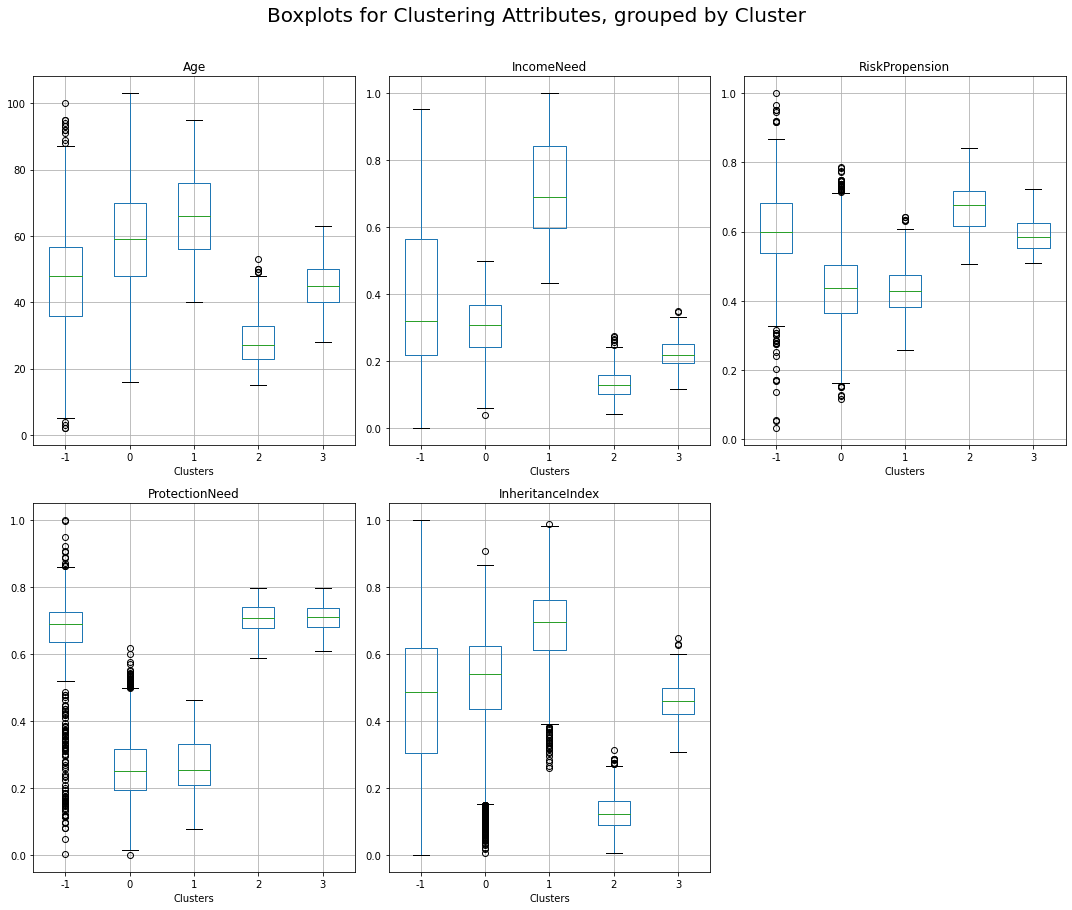

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
axes = axes.ravel()
for i, var in enumerate(load_vars["clustering_variables"]):
    labelled_all_data.boxplot(column = var, by='Clusters', ax = axes[i])
fig.delaxes(axes[-1])
plt.tight_layout() 
plt.suptitle('Boxplots for Clustering Attributes, grouped by Cluster', size=20, y=1.05)
plt.show()

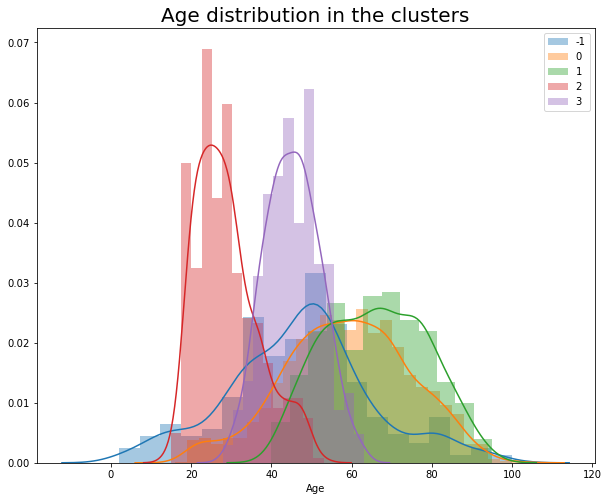

In [278]:
plt.figure(figsize=(10,8))
for cluster in range(-1, 4):
    sns.distplot(labelled_all_data.iloc[np.where(labelled_all_data['Clusters'] == cluster)]['Age'], label=(cluster))
plt.legend()
plt.title("Age distribution in the clusters", size=20)
plt.show()

Da questi boxplot si vede come tutte le variabili utilizzate posseggano un qualche grado di clusterizzazione, come ci si potrebbe aspettare data la selezione delle stesse tramite entropia. In particolare, `ProtectionNeed` separa molto i cluster 0 e 1 dai cluster 2 e 3, tanto che, a meno di qualche valore outlier nel cluster 0, se un individuo ha un alto valore di `ProtectionNeed` sarà sicuramente nei cluster 2 o 3. 
Per le altre variabili, sebbene sia presente una clusterizzazione, essa è meno netta che in questo caso. Per esempio, un individuo con alto valore di `IncomeNeed` (sopra 0.6) sarà sicuramente nel cluster 1, mentre per bassi valori si troverà in uno degli altri cluster. Ancora, nessun individuo sopra i 60 (circa) può essere nel cluster 2 o 3, mentre il cluster 0 contiene un range molto ampio di età. 

Analoghi ragionamenti valgono per le due variabili non citate, ovvero `InheritanceIndex` e `RiskPropension`. 

Questi risultati mostrano lungo quali attributi avvenga la più forte clusterizzazione, e quale sia il range dei diversi cluster lungo le varie dimensioni. Ovviamente, gli esempi e i ragionamenti fatti escludono il cluster -1, che rappresenta i punti di *noise*; su questi, si può affermare che non ci sia una vera clusterizzazione, in quanto presentano valori completamente eterogenei per tutti gli attributi.

### Errorplot

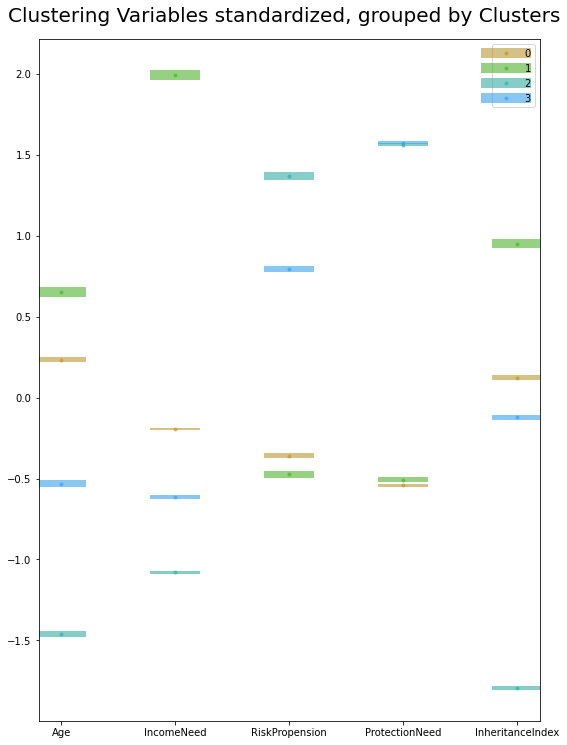

In [214]:
# Color palette
clustering_variables_2 = load_vars["clustering_variables"].copy()
clustering_variables_2.append("Clusters")
X = pd.DataFrame(StandardScaler().fit_transform(labelled_all_data[load_vars["clustering_variables"]]), 
                 columns=load_vars["clustering_variables"])
X['Clusters'] = labelled_all_data["Clusters"]

# !!! Must be changed for final version !!!
palette = sns.color_palette('husl', len(clustering_variables_2))

x = load_vars["clustering_variables"]
plt.figure(figsize=(8,10))
for i in range(5):
    if i != 0:
        y = list(X[clustering_variables_2].groupby("Clusters").mean().reset_index().iloc[i,1:])
        err = list(X[clustering_variables_2].groupby("Clusters").std().reset_index().iloc[i,1:]/np.sqrt(X[clustering_variables_2].groupby("Clusters").count().reset_index().iloc[i,1:]))
        plt.errorbar(x, y, marker='.', linewidth=0, yerr = err, elinewidth=50, c=palette[i], alpha=0.6, label=i-1)
plt.suptitle('Clustering Variables standardized, grouped by Clusters', size=20, y=1.03)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Da questa rappresentazione si vede come tutti i cluster abbiano delle differenze statisticamente significative lungo per tutti gli attributi usati. I risultati delle medie sono perfettamente in linea con quanto si evince dai precedenti boxplot. In particolare, i cluster 2 e 3, che risultano i più giovani, sono quelli coi valori di `RiskPropension` più alti: si va dopo a confrontare questo andamento con quelli che sono effettivamente i loro investimenti. 

## Portfolio attuale

### Boxplot

In [56]:
current_investment = ["PortfolioRisk", "PortfolioHorizon", "AuM", "BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash"]

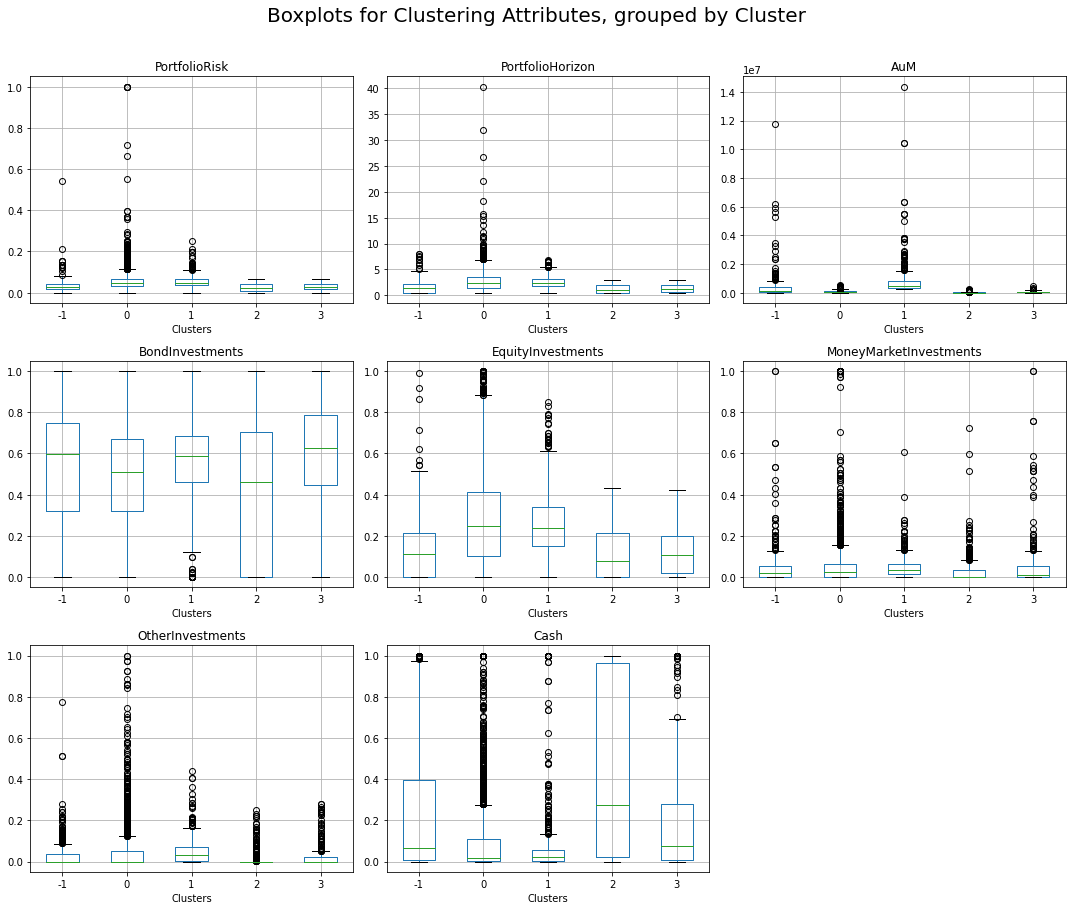

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
axes = axes.ravel()
for i, var in enumerate(current_investment):
    labelled_all_data.boxplot(column = var, by='Clusters', ax = axes[i])
fig.delaxes(axes[-1])
plt.tight_layout() 
plt.suptitle('Boxplots for Portfolio Attributes, grouped by Cluster', size=20, y=1.05)
plt.show()

I boxplot qua sopra mostrati rappresentano come sono distribuiti gli investimenti all'interno dei vari cluster - si ricordi che nessuna di queste variabili è usata per clusterizzare. In quanto i cluster sono legati a caratteristiche degli individui, e non a come essi abbiano i soldi investiti in questo momento, siamo interessati a vedere se ci sia differenza anche per quanto riguarda i loro attuali investimenti, oppure se ci sia omogeneità tra i gruppi. 

Questo grafico non è troppo intuitivo, in quanto pochi outlier con alti valori in alcuni cluster rendono poco leggibili alcuni assi, come `PortofolioRisk`. A occhio si può comunque notare che, sebbene non ci siano due cluster lungo tutti i boxplot le cui distribuzioni siano mutualmente esclusive, vi sono delle differenze in come gli individui appartenenti a diversi cluster eseguono investimenti. Per poter però ottenere qualcosa di interessante, si può ricorrere al confronto stastistico tra le medie.

### Errorplot

A causa dei diversi valori che alcuni indici possono assumere, si riportano solamente nel grafico insieme quelli che sono compresi tra 0 e 1, quindi `PortfolioRisk`, `BondInvestments`, `EquityInvestments`, `MoneyMarketInvestments`, `OtherInvestments` e `Cash`.

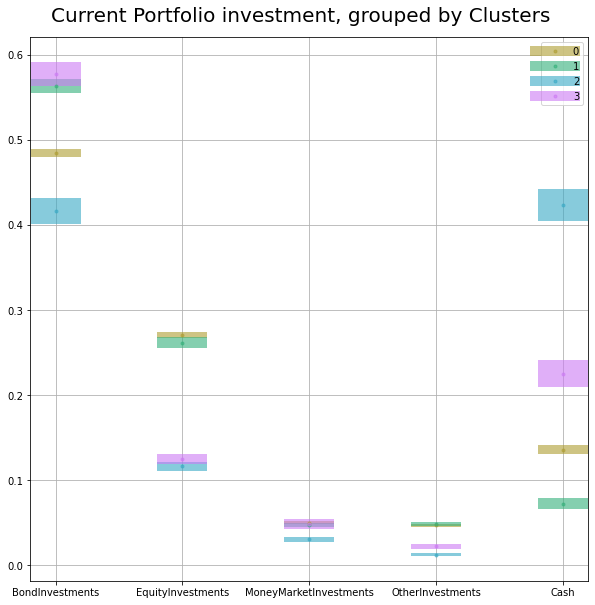

In [289]:
# Define variables to plot on x axis
current_investment_2 = ["BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash", "Clusters"]
# Color palette
# !!! Must be changed for final version !!!
palette = sns.color_palette('husl', 5)

x = ["BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash"]
plt.figure(figsize=(10,10))
for i in range(5):
    if i != 0:
        y = list(labelled_all_data[current_investment_2].groupby("Clusters").mean().reset_index().iloc[i,1:])
        err = list(labelled_all_data[current_investment_2].groupby("Clusters").std().reset_index().iloc[i,1:]/np.sqrt(labelled_all_data[current_investment_2].groupby("Clusters").count().reset_index().iloc[i,1:]))
        plt.errorbar(x, y, marker='.', linewidth=0, yerr = err, elinewidth=50, c=palette[i], alpha=0.6, label=i-1)
plt.suptitle('Current Portfolio investment, grouped by Clusters', size=20, y=0.9222)
plt.legend(loc='best')
# plt.tight_layout()
plt.grid(True, 'major')
plt.show()

I risultati qua sono più interessanti. In particolare, si nota che i diversi gruppi, che sono differenziati per i vari attributi che abbiamo usato per il clustering, presentano, in media, degli andamenti diversi tra di loro. 
In particolare:

- I gruppi 2 3 prediligono investimenti in `Cash` e `BondInvestment`, sebbene il 2 sia decisamente preponderante verso il `Cash`; questo gruppo è associato a un'età più bassa in media, oltre che minore `IncomeNeed` e `InheritanceIndex`. D'altro canto, però, gli appartenenti a questo gruppo tendono a presentare un alto valore di `RiskPropension`, fatto non in linea con i loro investimenti (si mostra sotto il `PortfolioRisk`).

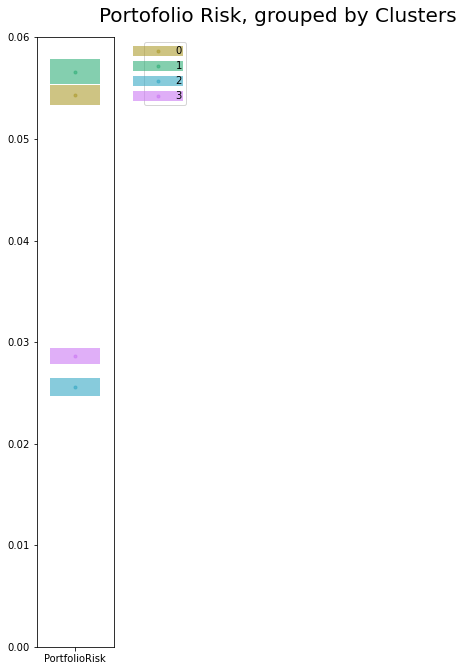

In [149]:
# Define variables to plot on x axis
current_investment_3 = ["PortfolioRisk", "Clusters"]
# Color palette
# !!! Must be changed for final version !!!
palette = sns.color_palette('husl', 5)

x = ["PortfolioRisk"]
plt.figure(figsize=(8,9))
for i in range(5):
    if i != 0:
        y = list(labelled_all_data[current_investment_3].groupby("Clusters").mean().reset_index().iloc[i,1:])
        err = list(labelled_all_data[current_investment_3].groupby("Clusters").std().reset_index().iloc[i,1:]/np.sqrt(labelled_all_data[current_investment_3].groupby("Clusters").count().reset_index().iloc[i,1:]))
        plt.errorbar(x, y, marker='.', linewidth=0, yerr = err, elinewidth=50, c=palette[i], alpha=0.6, label=i-1)
plt.suptitle('Portofolio Risk, grouped by Clusters', size=20, y=1.03)
plt.legend(bbox_to_anchor=(2, 1))
plt.tight_layout()
plt.ylim((0,0.06))
plt.show()

Quest'utlimo risultato è molto interessante e mostra come ci sia del disaccordo tra la **propensione al rischio** degli individui all'interno dei cluster e i loro effettivi investimenti. In particolare, il ranking della propensione al rischio, lungo la quale i gruppi sono stati clusterizzati, è:

[2 3 0 1]

mentre il ranking per l'investimento attuale è l'esatto opposto:

[1 0 3 2]

# Prodotti

In [236]:
clustering_variables_2 = load_vars["clustering_variables"].copy()
clustering_variables_2.append("Clusters")

In [238]:
labelled_all_data[clustering_variables_2].groupby("Clusters").mean()

,Age,IncomeNeed,RiskPropension,ProtectionNeed,InheritanceIndex
Clusters,,,,,
-1,47.288703,0.388962,0.597208,0.624922,0.460488
0,58.699206,0.302256,0.442095,0.261559,0.509605
1,66.058632,0.714394,0.426926,0.268849,0.674115
2,28.896842,0.135193,0.668354,0.706034,0.128081
3,45.250608,0.223256,0.592737,0.708604,0.460597


- **Cluster 0**: presenta un'*età* media di 58 e un ampio range; presenta una *income need* medio bassa, con quasi nessun valore sopra 0.5; ha un ampio range di *risk propension*, con una media poco sotto lo 0.5; i valori di *protection need* sono bassi, con quasi nessun individui avente sopra lo 0.5; presenta un ampio range di *inheritance index*, con media quasi esattamente a metà. Da questi dati, si può dire che questo cluster è caratterizzato da uomini intorno ai 60 anni, con poco bisogno di cedole/investimenti per il loro reddito (ovvero che possiedono altre fonti di reddito fisse), tendono a non essere troppo propensi al rischio, non hanno troppo bisogno di proteggere il proprio capitale dalle perdite del mercato e hanno un certo bisogni di ottimizzazione del loro partimonio per figli/eredi. 

    A oggi, questo gruppo tende in media ad avere un portofolio abbastanza rischioso, con molti dei soldi investiti in Bond e Equity; essi non tengono invece per niente soldi in Cash.
    
    Visto questo, si potrebbe suggerire di modificare leggermente gli investimenti all'interno di questo gruppo; sebbene da un lato siano in grado di supportare delle perdite, la tendenza a questi individui a non andare verso il rischio potrebbe far pensare di dare loro investimenti più sicuri delle azioni: aumentare gli investimenti in Bond, Cash e, eventualmente il cliente avesse delle scadenze brevi oppure non volesse avere troppa liquidità, si potrebbe investire su Money Market.
    
- **Cluster 1**: è il cluster con più persone anziane, di età media 66, sebbene sia presenti persone dai 40 ai 100 anni. A differenza del cluster precedente, questi individui sono caratterizzati da una più grande necessità di reddito da parte di cedole/dividendi; la loro propensione al rischio è la più bassa tra tutti i cluster e, come il precedente, hanno una bassa *protection need*; come ci si potrebbe aspettare, il valore di *inheritance index* è il più alto tra tutti i cluster.

    A oggi, questo gruppo è quello che presenta minore percentuale di liquidità, con la maggior parte dei soldi investiti in Bond. 
    
    Data la bassa propensione al rischio e la necessità di ottimizzare il patrimonio, l'attuale posizione di investimento potrebbe essere modificata aumentando la liquidità. Sebbene questo sia l'investimento meno redditizio, è anche il più sicuro, in linea con le tendenze di questo gruppo; inoltre, mantenere i soldi in cash è sicuramente in ottomo ottimizzatore del patrimonio per gli eredi.
    
- **Cluster 2**: questo è il gruppo più giovane, con età media di 27, sebbene siano presenti anche individui più vecchi o più giovani. Questi individui sono i più propensi al rischio, hanno meno necessità di reddito da dividendi/cedole ma, probabilmente a causa di una minore disponibilità finanziaria, hanno bisogno di più protezione finanziara da pardite. Inoltre, i valori di ottimizzazione per gli eredi sono molto bassi.

    Il loro investimento attuale potrebbe essere modificato puntando a investire una maggior percentuale del loro asset in Bond da Cash. Sebbene questo gruppo sia meno in grado di sopportare delle perdite, una parte maggiore del denaro potrebbe essere investita in Azioni o Moneta, in linea con le tendeze di rischio.
    
- **Cluster 3**: il gruppo dei *middle age*, il range delle età vai tra i 30 e i 60, con una media di 45. In linea con il cluster precedente, presentano poco *IncomeNeed* e una *RiskPropension* abbastanza elevata. La *ProtectionNeed* è statisticamente uguale al cluster 2 ma, a differenza di questo, il valore di *InheritanceIndex* è quasi 0.5, ovvero più simile al cluster 0.

    L'investimento di questo cluster è sicuramente il più *au pair* con le loro caratteristiche, sebbene non presentino un elevato rischio. Una bassa capacità di supportare perdite finanziare, ma una tendenza al rischio media, farebbe infatte puntare su investimenti come i Bond, fatto che si vede essere vero. L'unico consiglio che si potrebbe dare è quello di investire più soldi da Cash in Azioni, in linea con le tendenze al rischio.
    
- **Cluster Noise**: questi sono gli individui che non rientrano all'interno di nessuno dei gruppi individuati, per diversi motivi. Per essi, non possiamo delineare un *prodotto modello*, e si deve rimandare a un'analisi per caso da parte di un'esperto di settore.